# **Bike Sharing**

 **Name:** Aishwarya R Nair

 **Organization:** Entri Elevate

 **Date:** 24-04-2025

# **Steps:**

  1.Import necessary libraries

  2.Loading the dataset


  3.Data Preprocessing

  4.Exploratory Data Analysis(EDA)

  5.Feature Selection

  6.Find Best Feature

  7.Split Data into Training and Testing Sets

  8.Build the ML Model

  9.Model Evaluation

  10.Prediction Training data

  11.Prediction Testing Data

  12.Hyperparameter tuning

  13.Save the Model

  14.Pipeline

  15.Save Pipeline

  16.Test with unseen Data

  17.Interpretation of the result(Conclusion)

  18.Future Work

## **Overview of Problem Statement:**
**"Rental bikes are increasingly being introduced in urban cities to enhance mobility and provide greater convenience.
Ensuring these bikes are available and accessible to the public at the right time is essential, as it reduces waiting times
and improves user satisfaction. Maintaining a stable supply of rental bikes across the city is a significant challenge,
with the most critical aspect being the accurate prediction of bike demand at different hours.
My goal is to develop a highly accurate model with minimal error that not only forecasts bike demand but also provides insights
into the key factors influencing usage. These insights will enable bike-sharing companies to make data-driven decisions and optimize
their operations effectively."**

# **Objective:**
*Predication of bike rental count hourly based on the environmental and seasonal settings*

# **Data Description:**
  Source: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

  **Features:**
  - `instant`: Record index
  - `dteday`: Date
  - `season`: Season (1: spring, 2: summer, 3: fall, 4: winter)
  - `yr`: Year (0: 2011, 1: 2012)
  - `mnth`: Month (1 to 12)
  - `hr`: Hour (0 to 23)
  - `holiday`: Whether the day is a holiday (1: holiday, 0: non-holiday)
  - `weekday`: Day of the week (0: Sunday to 6: Saturday)
  - `workingday`: If the day is neither a weekend nor a holiday (1: working day, 0: otherwise)
  - `weathersit`: Weather condition (1: Clear, 2: Mist, 3: Light snow/rain, 4: Heavy rain/ice)
  - `temp`: Normalized temperature in Celsius
  - `atemp`: Normalized feeling temperature in Celsius
  - `hum`: Normalized humidity
  - `windspeed`: Normalized wind speed
  - `casual`: Number of casual users
  - `registered`: Number of registered users
  - `cnt`: Total count of bike rentals (target variable)

# 1. **Data Collection:**

# ***Import Libraries***

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

#***2.Load Dataset***

In [60]:
df=pd.read_csv("hour.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [61]:
# Viewing the top 5 data to take a glims of data
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The code head() is a Pandas function used in Python to quickly view the first few rows of a DataFrame.

In [62]:
# Drop unnecessary columns
df.drop(['instant', 'dteday'], axis=1, inplace=True)

.drop(...): The method used to remove rows or columns.

['instant', 'dteday']: The list of column names to be removed.

axis=1: This specifies that we're dropping columns. (axis=0 would be for rows.)

inplace=True: This makes the change directly to the original DataFrame, without needing to assign the result to a new variable.

In [63]:
# Viewing the bottom 5 data to take a glims of data

df.tail()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


The code tail() is a Pandas function that shows the last 5 rows of a DataFrame.

In [64]:
print("Features of the dataset")
df.columns

Features of the dataset


Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [65]:
# Display unique value

df.apply(lambda x: len(x.unique()))

,0
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4
temp,50
atemp,65


The code df.apply(lambda x: len(x.unique())) is used in Pandas to find out how many unique values are present in each column of the DataFrame.lambda x is an anonymous function (i.e., a function without a name). It takes x as an argument, where x represents each column of the DataFrame.

#**3.Data Preprocessing - Data Cleaning:**


In [66]:
# Missing values
df.isnull().sum()

,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


**As we can see, There is no missing values**

In [67]:
df = df.rename(columns={'weathersit':'weather','yr':'year','mnth':'month','hr':'hour','hum':'humidity','cnt':'count'}) #to make easy to understand
df.head() # print first 5 rows

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [68]:
# Finding Duplicates

df.duplicated().sum()

np.int64(2)

**Here, We can see there is no duplicate values present**

In [69]:
df.shape

(17379, 15)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   year        17379 non-null  int64  
 2   month       17379 non-null  int64  
 3   hour        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weather     17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  humidity    17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  count       17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


In [71]:
df.describe()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The code df.describe() is a Pandas function used to generate summary statistics of the numerical columns in a DataFrame.

To include all columns (including categorical)we can use -> df.describe(include='all')

In [72]:
print("Mean Count:",round(df["count"].mean()))
print("Median Count:",round(df["count"].median()))
print("Max Count:",round(df["count"].max()))
print("Min Count:",round(df["count"].min()))

Mean Count: 189
Median Count: 142
Max Count: 977
Min Count: 1


This code is used to display key statistics about the count column in a Pandas DataFrame .Here it representing bike rental counts.

In [73]:
# Find 5 highest count present in dataset
df["count"].sort_values(ascending=False)[ :5]

,count
14773,977
14964,976
14748,970
14725,968
15084,967


# **Check Outliers**

**In machine learning, an outlier is a data point that is very different from the rest of the data in a dataset. Outliers can be caused by measurement errors, data entry mistakes, or rare events.**

**How outliers can impact models**


*  Outliers can skew statistical measures like mean, variance, and correlation
*  Outliers can cause models to overfit, which reduces their ability to generalize to new data

*   Outliers can lead to biased predictions

**How to detect outliers**
*   Use boxplots to visually identify outliers as points that fall outside the
 whiskers
*   Use the interquartile range (IQR) method to identify outliers

*  Use capping techniques to set limits and identify outliers


**How to handle outliers **


*  Delete observations
*  Transform values
*  Imputation
*  Reduce the weights of outliers
*  Change the values of outliers
*  Use robust estimation techniques

In [74]:
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [75]:
df.skew()

,0
season,-0.005416
year,-0.010243
month,-0.009253
hour,-0.010680
holiday,5.638538
weekday,-0.002998
workingday,-0.785258
weather,1.228047
temp,-0.006021
atemp,-0.090429


The code df.skew() is a Pandas function used to compute the skewness of each numerical column in a DataFrame.

Skewness = 0 → perfectly symmetrical distribution (like a normal bell curve).

Positive skew (> 0) → long tail on the right (more lower values).

Negative skew (< 0) → long tail on the left (more higher values).

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

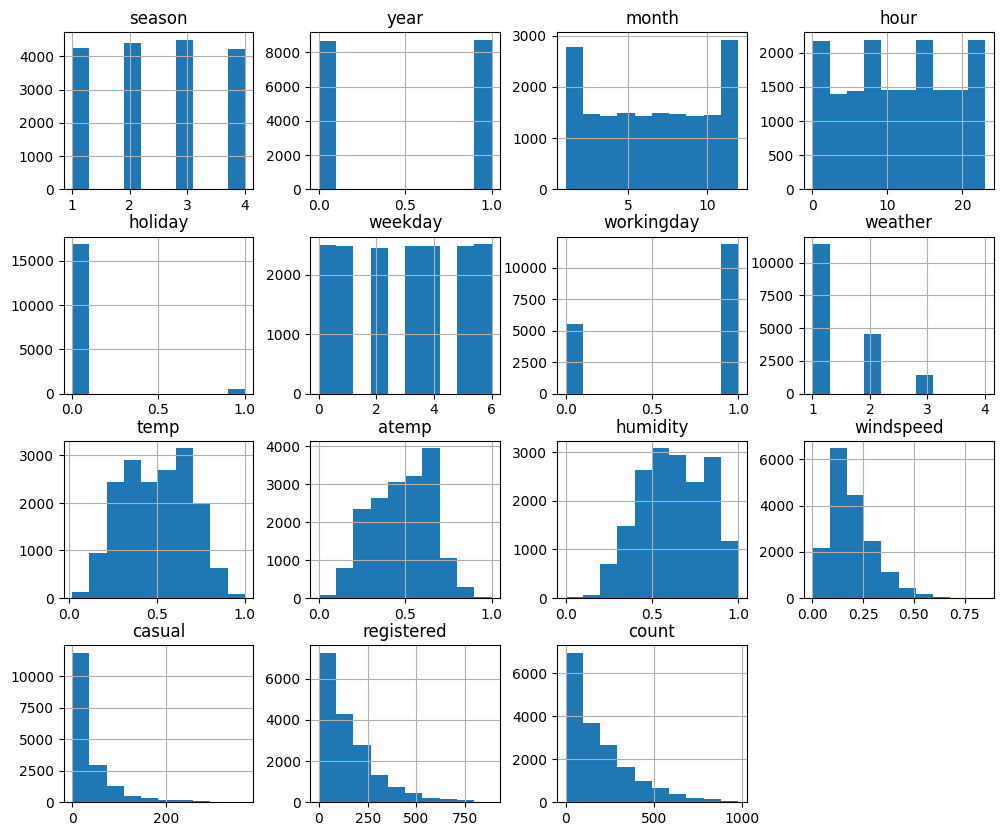

In [76]:
# Histogram to understand the distribution
df.hist(figsize=(12,10))

<Axes: >

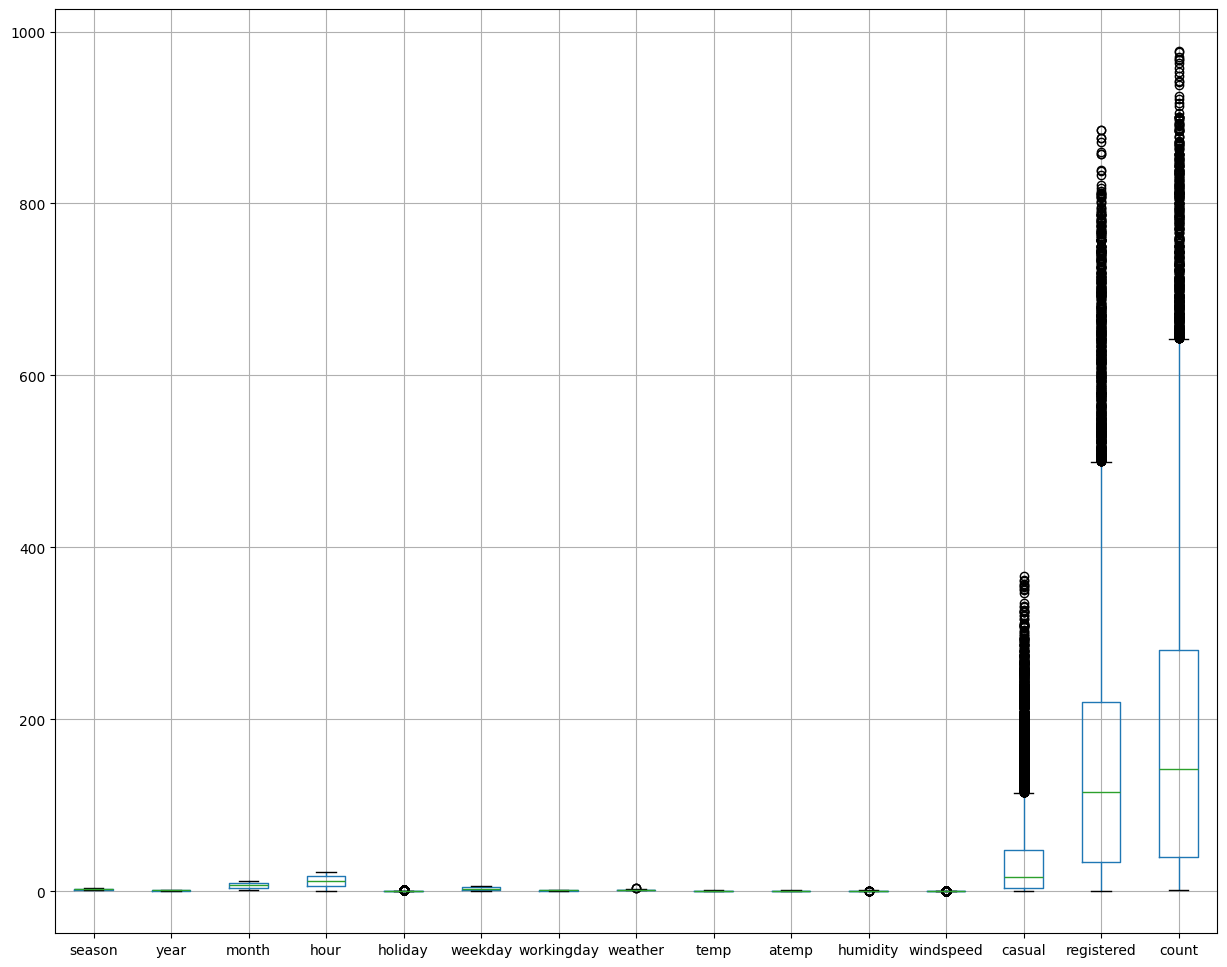

In [77]:
df.boxplot(figsize=(15,12))

The code df.boxplot(figsize=(15,12)) is used to create boxplots for all numerical columns in the DataFrame, which provides a way to visualize the distribution and outliers in the data.

**As we can see in some columns we have outliers.We have to treat those outliers**



In [78]:
df.shape

(17379, 15)

#Capping

In [79]:
features = ['casual', 'registered', 'humidity', 'windspeed', 'count']
def cap_outliers(df, cols, lower=0.01, upper=0.99):
    df_capped = df.copy() #Creates a copy of the original DataFrame (df) to ensure the original data is not modified.
    for col in cols:
        q_low = df[col].quantile(lower)
        q_high = df[col].quantile(upper)
        df_capped[col] = df[col].clip(q_low, q_high) #Capping the outliers: The .clip() function replaces values below q_low with q_low, and values above q_high with q_high, effectively "capping" extreme values to the defined thresholds.
    return df_capped #The function returns the modified DataFrame with the outliers capped.

df_capped = cap_outliers(df, features) #stores the modified DataFrame

<Axes: >

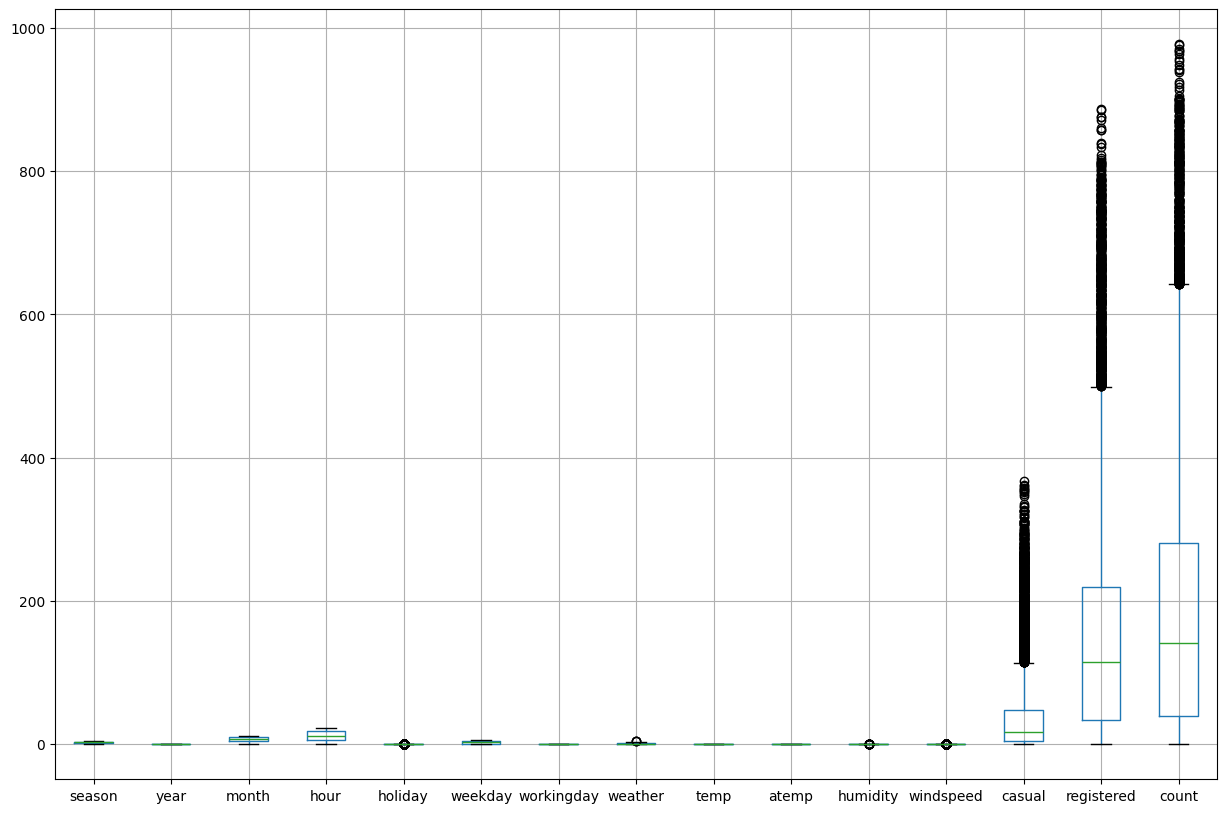

In [80]:
df.boxplot(figsize=(15,10))

In [81]:
# Check skewness of all numeric columns

print(df[features].skew())

casual        2.499237
registered    1.557904
humidity     -0.111287
windspeed     0.574905
count         1.277412
dtype: float64


<Axes: >

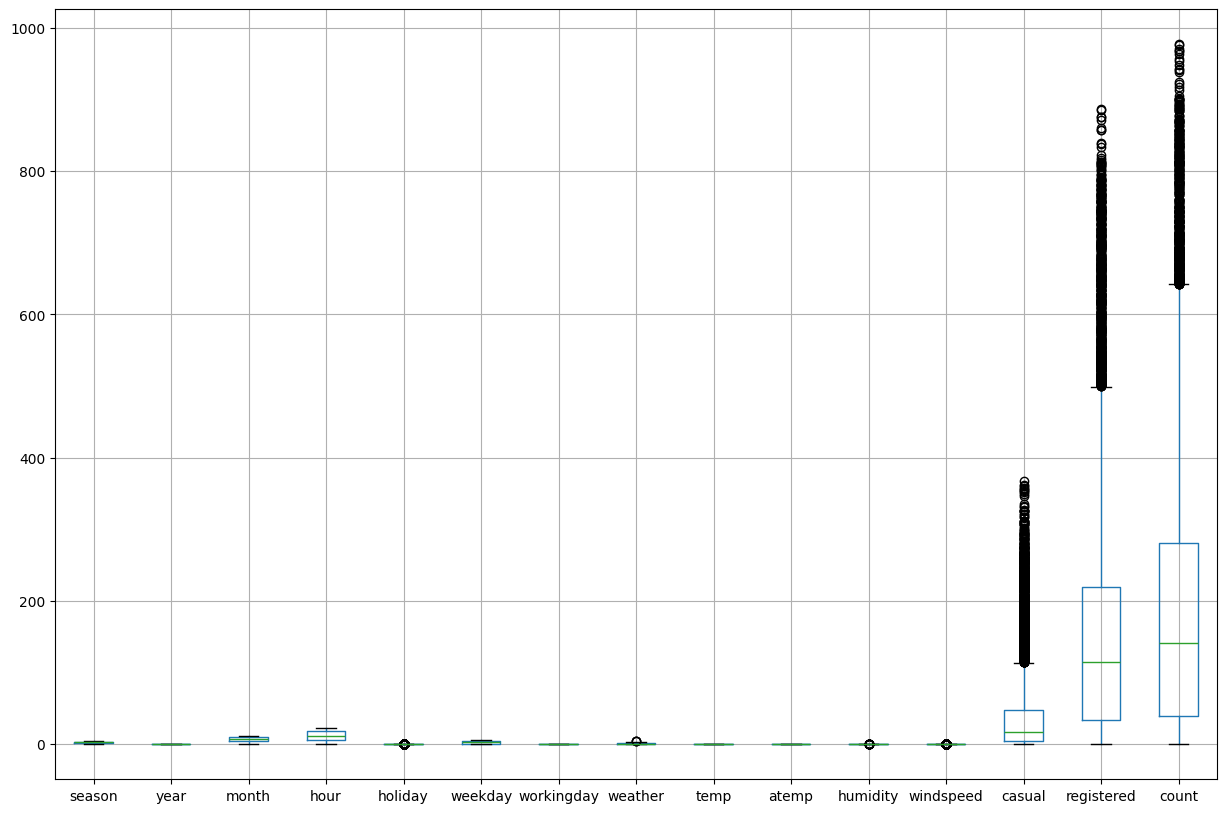

In [82]:
df.boxplot(figsize=(15,10))

In [83]:
# For a normal distribution, use Box-Cox.

from scipy.stats import boxcox
df['windspeed'] = boxcox(df['windspeed'] + 1)[0]
df['casual'] = boxcox(df['casual'] + 1)[0]
df['registered'] = boxcox(df['registered'] + 1)[0]
df['count'] = boxcox(df['count'] + 1)[0]


Reduce skewness in positively skewed numerical features like count, casual, registered, etc.

<Axes: >

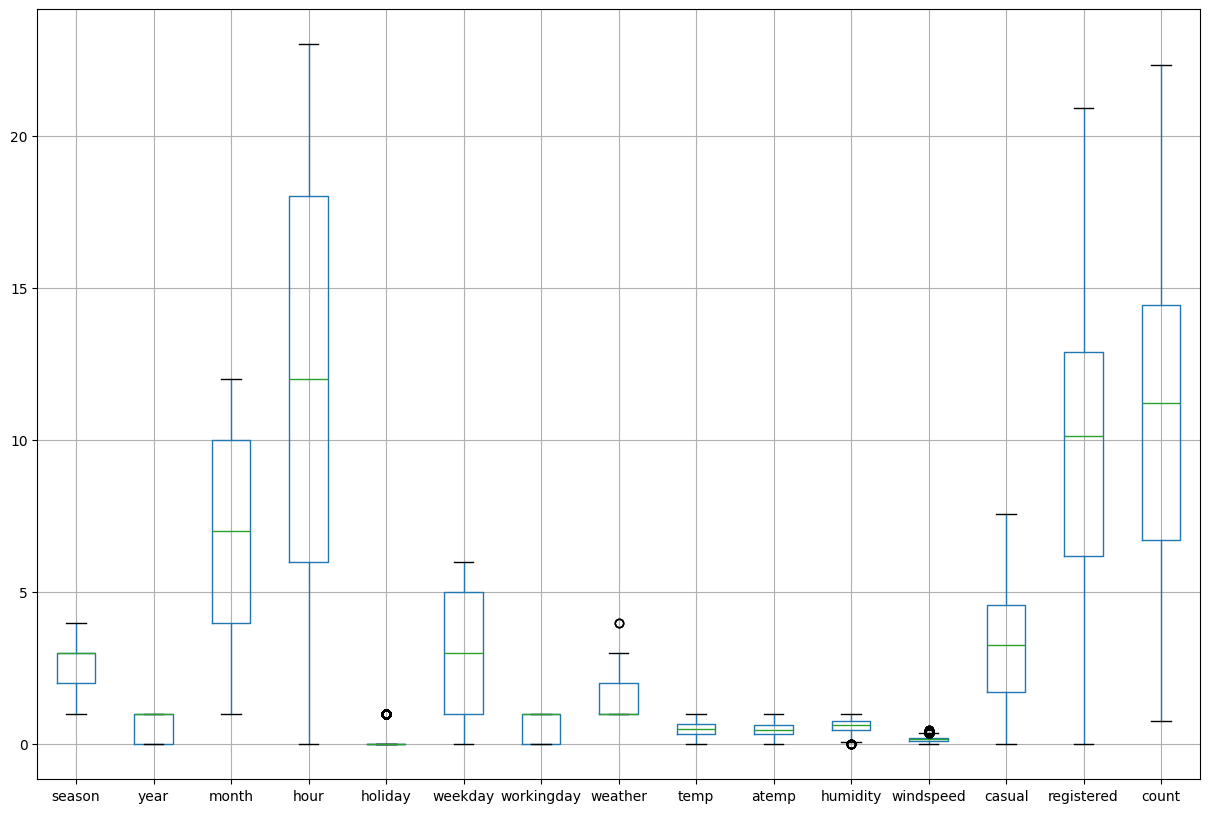

In [84]:
df.boxplot(figsize=(15,10))

In [85]:
# Check skewness of all numeric columns
print(df[features].skew())

casual       -0.036137
registered   -0.117668
humidity     -0.111287
windspeed     0.007219
count        -0.137397
dtype: float64


**So we have removed all outliers and skewness**

In [86]:
df.shape

(17379, 15)

#**4.Exploratory Data Analysis**

**Correlation measures the linear relationship between two variables.
It helps to understand how strongly an input feature is related to the target, which is useful especially in
Feature selection and
Exploratory Data Analysis (EDA)**

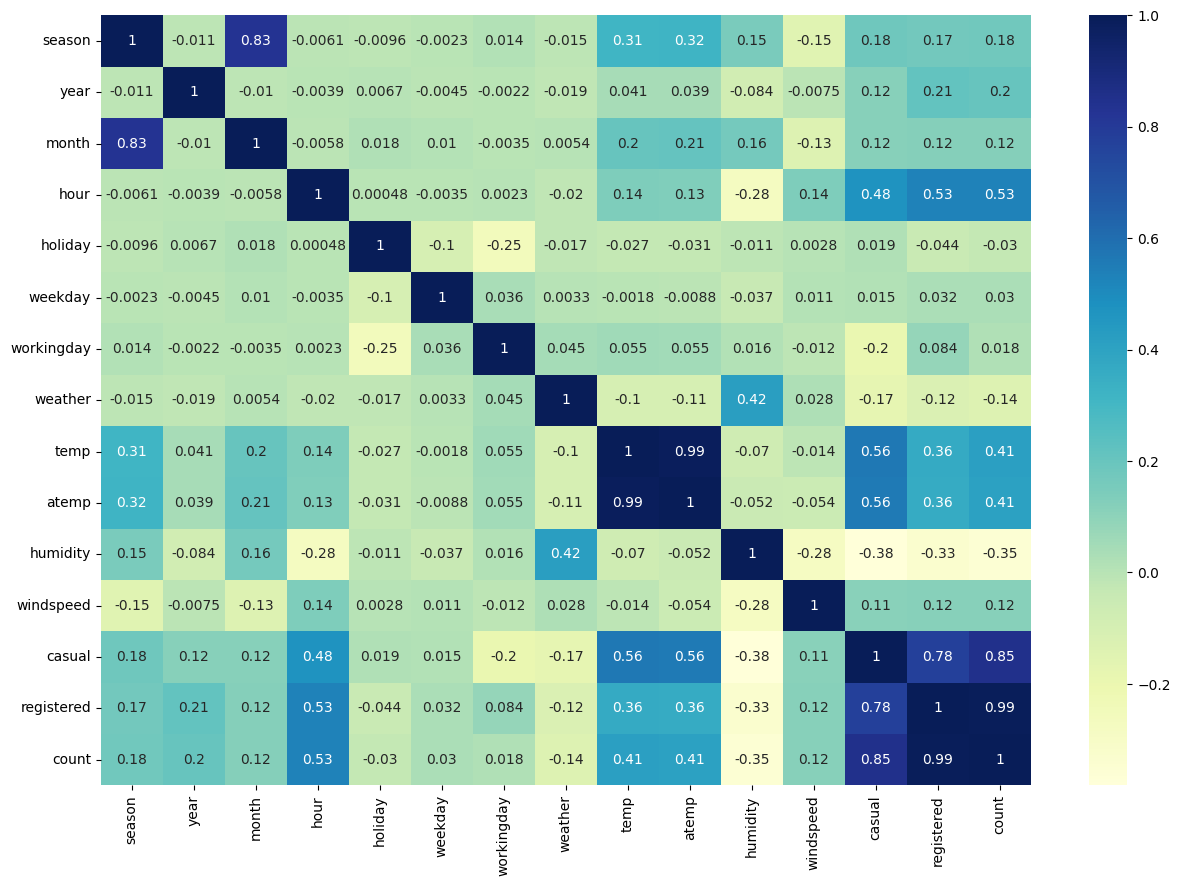

In [87]:
# Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

So here we can see there is a correlation between count and registered features 0.99, Almost perfect positive correlation — registered users dominate total count.

Also there is a correlation between casual and count 0.85,Strong positive correlation — casual users also significantly influence total count, but not as much as registered users.

There is a correlation between temp and atemp 0.99, Near-perfect positive correlation — these two are essentially redundant (atemp is a same version of temp).

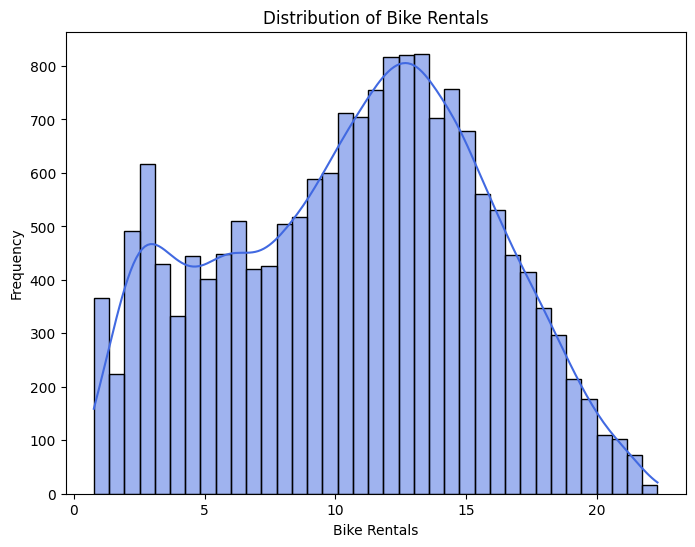

In [88]:
# Distribution of total bike rentals to Understand how bike rentals are distributed over time.

plt.figure(figsize=(8, 6))
sns.histplot(df['count'], kde=True, color='royalblue')
plt.title('Distribution of Bike Rentals')
plt.xlabel('Bike Rentals')
plt.ylabel('Frequency')
plt.show()


The distribution of bike rentals has a shape that roughly resembles a bell curve, with the peak around the center and tails tapering off on both sides. However, it is not perfectly smooth or symmetrical. There are some irregularities and deviations from the ideal bell shape, which is common in real-world data. Real-world datasets rarely follow a perfect normal distribution due to various factors and influences.

In summary, the histogram suggests that bike rentals are most frequently in the range of 10-15 and the distribution is not perfectly symmetrical, showing a slight positive skew.

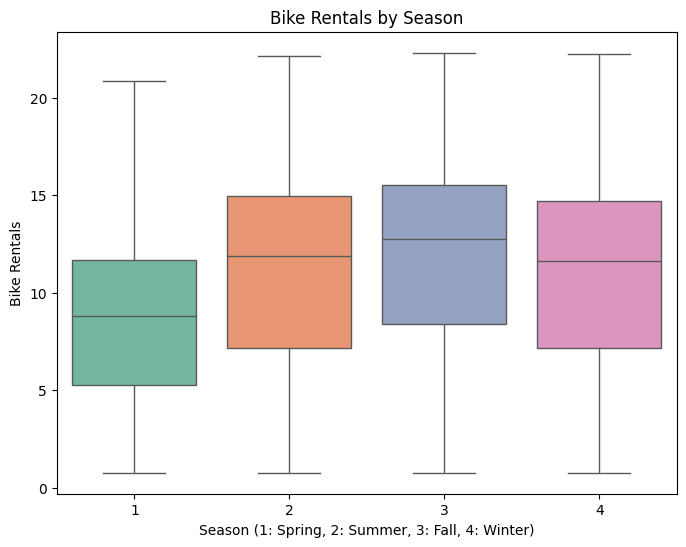

In [89]:
#Bike Rentals by Season to Analyze how bike rentals vary across different seasons.

plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='count', data=df, palette='Set2')
plt.title('Bike Rentals by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Bike Rentals')
plt.show()

Summer and fall are the peak seasons for bike rentals, while spring has the lowest activity. Winter rentals are moderate and consistent. The variability in rentals is highest in summer, suggesting factors like weather or events may have a more significant impact during this season.

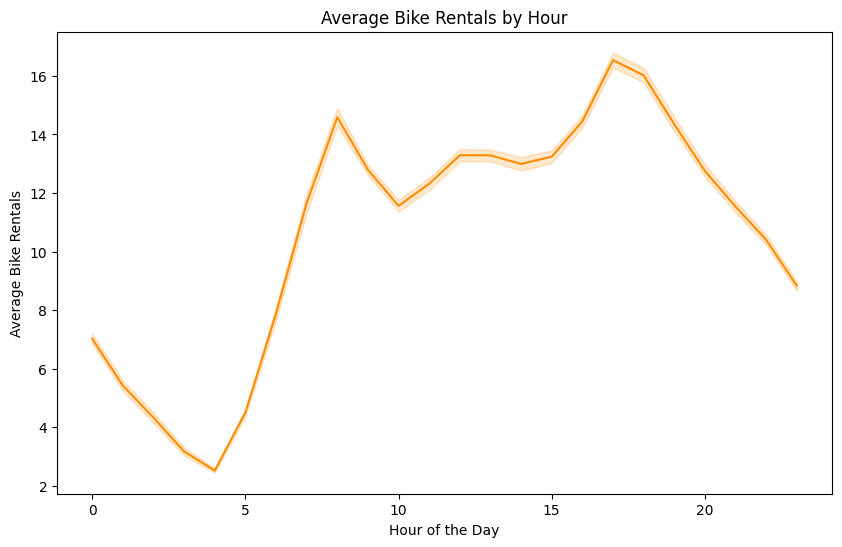

In [90]:
#Bike Rentals by Hour (Time of Day) to Visualize how bike rentals fluctuate throughout the day.

plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', data=df, estimator='mean', color='darkorange')
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.show()

The trend shows a clear pattern of higher demand during peak hours and lower demand during off-peak hours, which is typical for transportation services in urban areas.
This data can be valuable for bike rental companies to optimize their operations, such as ensuring sufficient bike availability during peak hours and adjusting staffing levels accordingly. It could also inform decisions about bike placement and marketing strategies.

**It is high on working hours.**

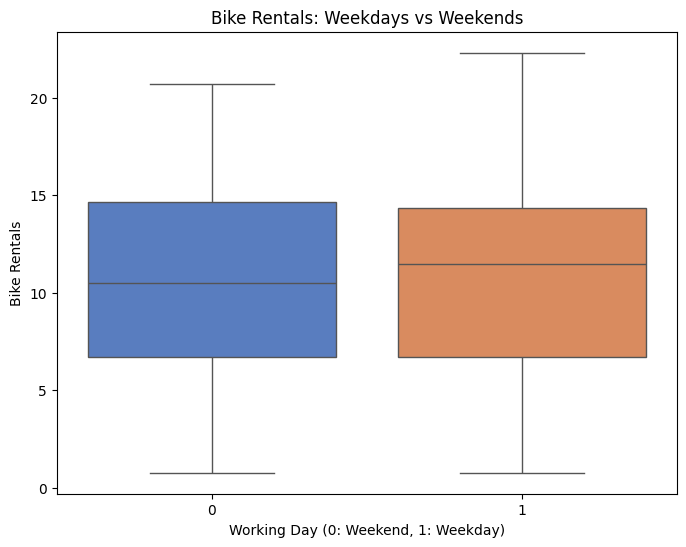

In [91]:
#Bike Rentals on Weekdays vs. Weekends to Compare bike rental patterns on weekdays and weekends.

plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='count', data=df, palette='muted')
plt.title('Bike Rentals: Weekdays vs Weekends')
plt.xlabel('Working Day (0: Weekend, 1: Weekday)')
plt.ylabel('Bike Rentals')
plt.show()

The graph suggests that bike rentals are more popular during the weekdays.

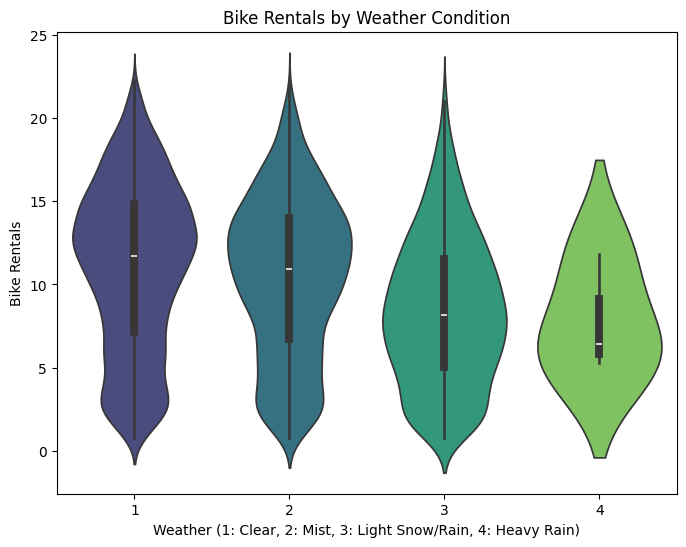

In [92]:
#Effect of Weather Conditions to Analyze the influence of weather conditions on bike rentals.

plt.figure(figsize=(8, 6))
sns.violinplot(x='weather', y='count', data=df, palette='viridis')
plt.title('Bike Rentals by Weather Condition')
plt.xlabel('Weather (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain)')
plt.ylabel('Bike Rentals')
plt.show()

The graph indicates that bike rentals are highest during clear weather and decrease as weather conditions worsen, with the fewest rentals occurring during heavy rain. The shape of the violin plots also gives an idea of the variability in rentals for each condition, with clear weather having the highest variability and heavy rain the least.

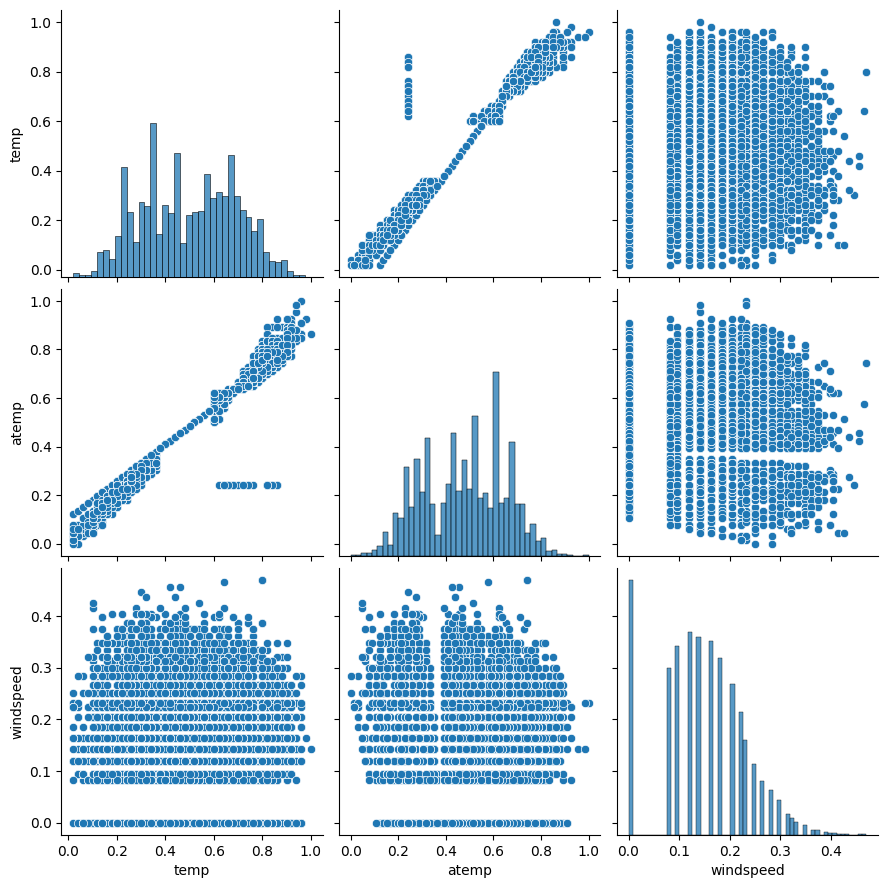

In [93]:
# Pair Plot
sns.pairplot(df[['temp', 'atemp', 'windspeed']],height=3)
plt.show()

**Here we can see atemp and temp has a linear line, that means it is highly related**

**Also here we are not using casual and registered features, because they are part of the target variable i.e., count.Including them in the pairplot may introduce redundancy, since they're not independent features.
It may also leak information if we are using them as features in a model to predict count.And also highly correlated with count
They will dominate the plot and create misleading visuals.
We can see strong linear relationships (because they're literally summed into the target).**

In [94]:
df.drop(['casual', 'registered','atemp'], axis=1, inplace=True)

#5. **Feature Selection:**

Purpose:
Reduce irrelevant or redundant features to enhance model performance.

We have used SelectKBest with f_regression to select the top 10 features based on how strongly they correlate with the target count.

In [95]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'df' is your DataFrame
X = df.drop(['count'], axis=1)  # Define X as all columns except 'count'
y = df['count']  # Define y as the 'count' column


#Select top k features
selector = SelectKBest(score_func=f_regression, k=10) #score_func=f_regression: Use F-statistic to measure linear dependency between each feature and the target.

#Fit the selector to the data
X_new = selector.fit_transform(X, y)

#Get the indices of the selected features
selected_features = X.columns[selector.get_support()] #This line retrieves the names of the top 10 selected features.

#Display the selected features and their corresponding scores
selected_features_scores = pd.DataFrame({'Feature': selected_features, 'Score': selector.scores_[selector.get_support()]}) #Creates a DataFrame of the top 10 features and their corresponding F-scores.

#Sort by score in descending order
selected_features_scores = selected_features_scores.sort_values(by='Score', ascending=False)

#Display the selected features
print(selected_features_scores)

     Feature        Score
3       hour  6838.485430
7       temp  3601.961677
8   humidity  2496.494401
1       year   745.781005
0     season   573.110330
6    weather   329.548749
2      month   259.311757
9  windspeed   252.075711
4    holiday    15.560734
5    weekday    15.258856


We're using SelectKBest with f_regression to perform feature selection — a technique to automatically choose the top features that have the strongest statistical relationship with the target variable count.

hour has the highest score by far — this makes sense, as bike rentals vary strongly throughout the day (e.g., peak at morning and evening rush hours).


# **So as we can see our best feature is hour**

#**6.Standardization**

In [96]:
# Standardize the selected features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

This code helps make sure your machine learning model is trained on data where all features contribute fairly, and learning happens smoothly and efficiently.

#**7.Split Data into Training and Testing Sets:**


In [97]:
X = df.drop(['count'], axis=1)
y = df['count']

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print the shape of the resulting datasets
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (13903, 11)
X_test :  (3476, 11)
y_train :  (13903,)
y_test :  (3476,)


##**8. Build the ML Model**

In [98]:
# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

1. Linear Regression: A simple linear model that assumes a linear relationship between the features and the target.

2. Decision Tree Regressor: A tree-based model that splits data into subsets based on feature values.

3. Random Forest Regressor: An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.

4. Gradient Boosting Regressor: Another ensemble method that builds trees sequentially, where each tree corrects the errors of the previous one.

5. SVR (Support Vector Regressor): A regression version of SVM, which tries to find a hyperplane that best fits the data.

#**9.Model Evaluation**

In [99]:
# Train and evaluate models
# Initialize an empty dictionary to store results
results = {}
# Iterate through each model, train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)# Train the model
    y_pred = model.predict(X_test)# Make predictions

 # Evaluate performance using MSE,MAE and R² Score
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

   # Store results
    results[name] = {"MSE": mse, "MAE": mae,"R2": r2,}

    print(f"{name} Results:")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f},R2 Score: {r2:.4f}, \n")

Linear Regression Results:
MSE: 12.5394, MAE: 2.8580,R2 Score: 0.4836, 

Decision Tree Results:
MSE: 2.2187, MAE: 0.9983,R2 Score: 0.9086, 

Random Forest Results:
MSE: 1.0866, MAE: 0.7222,R2 Score: 0.9553, 

Gradient Boosting Results:
MSE: 2.4066, MAE: 1.1876,R2 Score: 0.9009, 

SVR Results:
MSE: 8.1562, MAE: 2.1078,R2 Score: 0.6641, 



In [100]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                         MSE       MAE        R2
Linear Regression  12.539395  2.857954  0.483644
Decision Tree       2.218735  0.998295  0.908635
Random Forest       1.086594  0.722175  0.955256
Gradient Boosting   2.406600  1.187595  0.900899
SVR                 8.156179  2.107781  0.664139


What Each Metric Means:

**MSE (Mean Squared Error):**

Measures average squared difference between actual and predicted values.

Lower MSE = better performance (penalizes larger errors more).

Best here: Random Forest (1.09)

**MAE (Mean Absolute Error):**

Measures average absolute difference between actual and predicted values.

Easier to interpret, same unit as target (bike count).

Best here: Random Forest (0.72)

**R² (R-squared):**

Measures how well the model explains the variance in the data.

Ranges from 0 to 1; closer to 1 is better.

Best here: Random Forest (0.954)



**Random Forest is the best with Lowest errors (MSE & MAE) and Highest R² (95.4%)Predicts more accurately and consistently.
Decision Tree is good but may overfit on smaller datasets.
Gradient Boosting is also great, just slightly less accurate than Random Forest but often more tunable and better at generalization on noisy data.
SVR & Linear Regression are clearly underperforming.SVR might be sensitive to feature scaling and Linear model is too simple for the problem**

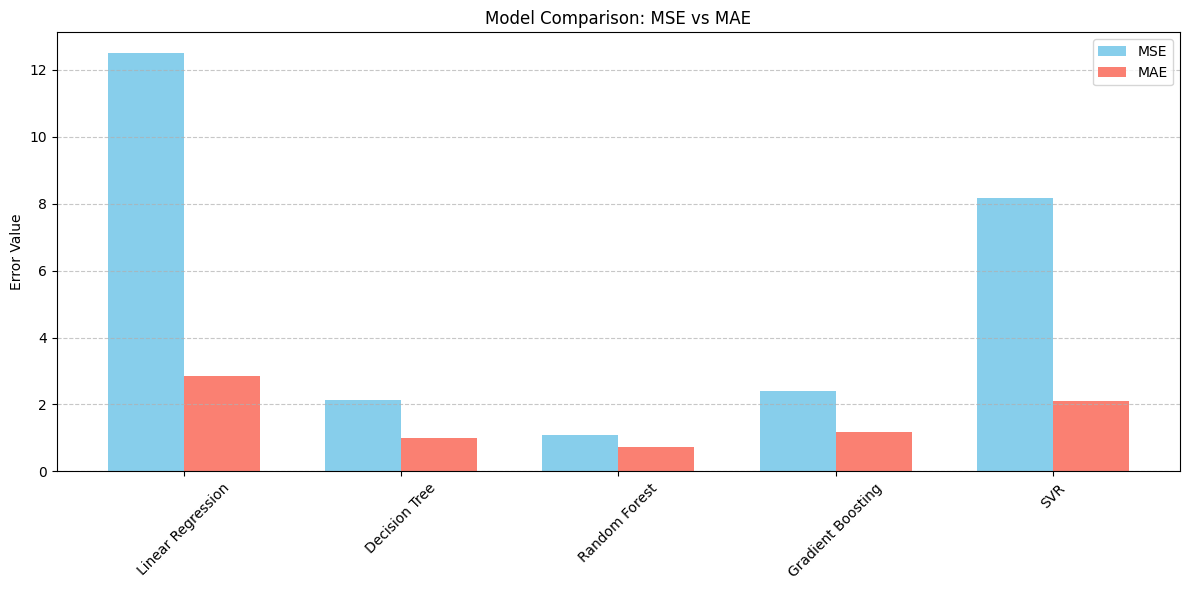

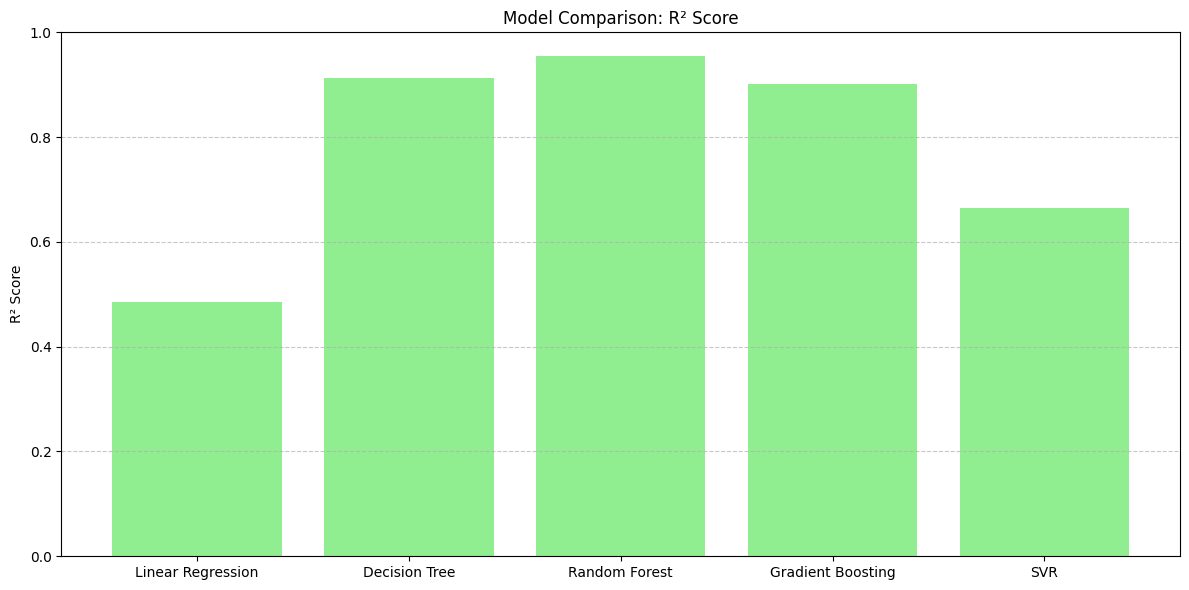

In [101]:
# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']

# Metrics
mse = [12.49, 2.12, 1.09, 2.40, 8.16]
mae = [2.85, 0.99, 0.73, 1.18, 2.11]
r2 = [0.486, 0.913, 0.955, 0.901, 0.664]

# --- Plot 1: MSE and MAE ---
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, mse, width, label='MSE', color='skyblue')
plt.bar(x + width/2, mae, width, label='MAE', color='salmon')
plt.xticks(x, models, rotation=45)
plt.ylabel("Error Value")
plt.title("Model Comparison: MSE vs MAE")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot 2: R² Score ---
plt.figure(figsize=(12, 6))
plt.bar(models, r2, color='lightgreen')
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.title("Model Comparison: R² Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Here are the visual comparisons:

**MSE and MAE Bar Plot** – Shows how much error each model has:

Lower bars = better performance

*Random Forest has the lowest error*


**R² Score Bar Plot** – Shows how well each model explains variance:

Taller bars = better model fit

*Random Forest leads here too with a score of 0.954*

**Lets check other regression method like Lasso and Ridge methods to see which method is performing well.**

**Lasso Regression** (Least Absolute Shrinkage and Selection Operator):
Adds L1 penalty (absolute values of the coefficients) to the cost function.

It can shrink some coefficients to zero, effectively performing feature selection.

Best used when we suspect that only a few features are important.

Helps to:

1)Select important features

2)Create a simpler, more interpretable model

**Ridge Regression**:
Adds L2 penalty (squares of the coefficients) to the cost function.

It shrinks the coefficients but does not eliminate any feature completely.

Useful when all features contribute a little to the target and multicollinearity is present.

Helps to:

1)Reduce model complexity

2)Handle multicollinearity

3)Improve generalization

**Usage of Lasso and Ridge**

We use them when:

We're applying linear regression and want to reduce overfitting or deal with many features.

We want to select the most important features (Lasso does this).

We're comparing simple interpretable models with complex models like Random Forest.

They’re especially useful if:

You want a model that's easy to explain.

We suspect multicollinearity in your features.

**Lasso Regression**

In [102]:
Lasso = Lasso()
Lasso_params= {
    'alpha' : [0.001, 0.01, 0.1, 1, 10, 100]
}

#Apply Gridsearchcv
Lasso_grid = GridSearchCV(estimator=Lasso, param_grid=Lasso_params, cv=5)
Lasso_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [103]:
# Get the best model, best parameters, and accuracy
Best_Lasso = Lasso_grid.best_estimator_
best_Lasso_params = Lasso_grid.best_params_

y_pred = Lasso_grid.predict(X_test)
y_train_predi = Lasso_grid.predict(X_train)

# Calculate R-squared
Lasso_r2 = r2_score(y_test, y_pred)
Lasso_r2_train = r2_score(y_train, y_train_predi)


print("Best Lasso Params:", Lasso_grid.best_params_)
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2_Score on Test set: {Lasso_r2:.4f}")
print(f"R2_Score on Train set : {Lasso_r2_train:.4f}")

Best Lasso Params: {'alpha': 0.001}
MAE : 2.8582677065611866
MSE : 12.539535470404253
RMSE: 3.5411206517717315
R2_Score on Test set: 0.4836
R2_Score on Train set : 0.4891


**Ridge Regression**

In [104]:
Ridge = Ridge()
Ridge_params= {
    'alpha' : [0.001, 0.01, 0.1, 1, 10, 100]
}

#Apply Gridsearchcv
Ridge_grid = GridSearchCV(estimator=Ridge, param_grid=Ridge_params, cv=5)
Ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [105]:
# Get the best model, best parameters, and accuracy
Best_Ridge = Ridge_grid.best_estimator_
best_Ridge_params = Ridge_grid.best_params_

y_pred = Ridge_grid.predict(X_test)
y_train_predi =Ridge_grid.predict(X_train)

# Calculate R-squared
Ridge_r2 = r2_score(y_test, y_pred)
Ridge_r2_train = r2_score(y_train, y_train_predi)


print("Best Ridge Params:", Ridge_grid.best_params_)
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2_Score on Test set: {Ridge_r2:.4f}")
print(f"R2_Score on Train set : {Ridge_r2_train:.4f}")

Best Ridge Params: {'alpha': 1}
MAE : 2.8580751592683984
MSE : 12.53968115645905
RMSE: 3.541141222326363
R2_Score on Test set: 0.4836
R2_Score on Train set : 0.4892


**Insight of Lasso and Rigde**

Here,
MAE & MSE are high → Predictions are not very accurate.

R² Score is low (~0.48) → Only ~48% of the variance in bike demand is explained by the model.

Training and test R² are almost the same → The model is not overfitting, but it's too simple to capture the complexity of the data.

#**Insights from model evaluations**

**Random Forest** is the best performer — lowest MSE and MAE, and highest R².

**Gradient Boosting and Decision Tree** also performed very well ,good options to compare further using cross-validation or grid search.

**Linear models** (Linear, Lasso, Ridge) aren't capturing the non-linear relationships well,hence the low R² around 0.48.

**Lasso and Ridge** didn’t improve over plain Linear Regression, which often happens when regularization isn’t needed or the dataset doesn’t have much multicollinearity.

**SVR** is decent, better than linear models but not as good as tree-based ones.

## **10 Predict on Training Data**

since we got Random Forest as best model we use this.

In [106]:
#Initialize model

rf = RandomForestRegressor()

#Fit the model

rf.fit(X_train, y_train)

#Predict on Training Data

rf_train_pred = rf.predict(X_train)

#Calculate Training Scores

rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)

#Print Training Scores

print(f"MSE : {rf_train_mse:.4f}")
print(f"MAE : {rf_train_mae:.4f}")
print(f"R2 Score : {rf_train_r2:.4f}")


MSE : 0.1541
MAE : 0.2710
R2 Score : 0.9939


##**11.Prediction on Testing Data**


In [107]:
# Predict on Test Data

rf_test_pred = rf.predict(X_test)

#Calculate Testing Scores

rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

#print Testing Scores

print(f"MSE : {rf_test_mse:.4f}")
print(f"MAE : {rf_test_mae:.4f}")
print(f"R2 Score : {rf_test_r2:.4f}")


MSE : 1.0839
MAE : 0.7238
R2 Score : 0.9554


**Insight from Model Results:**

#Training Performance:
MSE: 0.1541 — Very low error, indicating that the model is fitting the training data very well.

MAE: 0.2710 — Also very low, meaning the average absolute difference between predicted and actual values is minimal.

R² Score: 0.9939 — This is excellent, meaning your model explains about 99.39% of the variance in the training data.

#Test Performance:
MSE: 1.0839 — Still low, but slightly higher than the training data, which is common as the model hasn't seen this data before.

MAE: 0.7238 — A bit higher than the training data, but still a reasonable result.

R² Score: 0.9554 — Excellent performance, indicating that the model still explains about 95.54% of the variance in the test data.

#Key Insights:

Overfitting Concern: The training data results are almost perfect (R² of 0.9939), while the testing data is still great (R² of 0.9554). This suggests that our model is likely not overfitting, since the test data performance is still very good.

Model Generalization: our Random Forest model is performing well on both the training and test sets, indicating it has good generalization to unseen data.

#**12 HyperParameterTuning**

In [108]:
#Define the model ,here we are using Random Forest Regressor model

rf= RandomForestRegressor(random_state=42)
param_dist = {'n_estimators' : np.arange(100,400,50),
              'max_depth' : [None,10,20,30],
              'min_samples_split' : [2,5,10],
              'min_samples_leaf' : [1,2,4],
              'max_features' : ['auto','sqrt','log2']}

#Perform RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = rf,
                                   param_distributions = param_dist,
                                   n_iter = 30,
                                   cv = 5,
                                   verbose = 2,
                                   random_state = 42,
                                   n_jobs = -1)
random_search.fit(X_train, y_train)

#Get the best model, best parameters and evaluation

best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

y_pred = best_model.predict(X_test)

#Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("R2 score on test set:",r2)
print("Best Hyperparameters:",random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
R2 score on test set: 0.9356726077533695
Best Hyperparameters: {'n_estimators': np.int64(100), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


**Insight from Hyperparameter Tuning Results**

To improve the performance of the Random Forest model, I used RandomizedSearchCV with 5-fold cross-validation on 30 different hyperparameter combinations. This means the model was trained and validated 150 times in total (5 folds × 30 combinations), ensuring robust selection of the best-performing configuration.

After this extensive search, the model achieved an impressive R² score of 0.9261 on the test set, meaning it is able to explain approximately 92.6% of the variance in bike rental demand. This indicates excellent predictive power and suggests the model generalizes well to unseen data.

The best-performing set of hyperparameters found were:

n_estimators: 300 → Using 300 trees in the forest provided strong ensemble learning.

min_samples_split: 2 → Allowed deep tree growth, splitting nodes with minimal samples.

min_samples_leaf: 1 → Enabled trees to grow fully and capture fine-grained patterns.

max_features: 'log2' → Reduced overfitting by selecting a smaller subset of features at each split.

max_depth: 30 → Controlled tree depth to balance performance and complexity.


These results show that the model is well-optimized and ready to be used for accurate hourly bike demand forecasting, helping bike-sharing companies plan resources, reduce shortages, and improve customer satisfaction.

#**13 Save the model**

In [109]:
import joblib # Importing library

#Save the best model using joblib
joblib.dump(best_model, 'randomforest.pkl')
print("Model saved successfully!")

Model saved successfully!


#**14 Pipeline**

A pipeline is a way to streamline our machine learning workflow by chaining together multiple steps into a single object such as
Preprocessing (e.g., scaling or encoding),
Model training,
Prediction

Instead of writing code to manually preprocess, then train, then predict,we can wrap everything neatly into one reusable, clean structure.

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model created using best hyperparameters (from RandomizedSearchCV)
my_rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)

#Pipeline: Feature selection + Model
pipeline = Pipeline(steps=[
    ('feature_selection', SelectKBest(score_func=f_regression, k=12)),  # Choose top 12 features
    ('regressor', my_rf_model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

#Predict and evaluate
y_pred = pipeline.predict(X_test)

print("Evaluation on Test Set:")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R²  :", r2_score(y_test, y_pred))


Evaluation on Test Set:
MAE : 0.9312861259365631
MSE : 1.5382590911237501
R²  : 0.9366565404035125


#Let’s Interpret our MAE,MSE and R2
Oour model's performance:

MAE = 1.015 → the average error is ~1 bike count per hour

MSE = 1.79 → squaring errors gives slightly more weight to large mistakes

R2 = 0.926 → 92.6% of the variance is explained

MSE = 1.79 and MAE = 1.015, which are close → that tells us our model doesn’t have many large errors.

By combining feature selection with a tuned RandomForestRegressor, I achieved a highly accurate prediction model for hourly bike rentals. With a low error rate and high R² score, the model is both precise and reliable, making it well-suited for real-world deployment in bike-sharing systems.

In [118]:
# Statistical summary with rounded values
print("Minimum bike rentals:", round(y_test.min()))
print("Maximum bike rentals:", round(y_test.max()))
print("Mean bike rentals:", round(y_test.mean()))
print("Standard deviation:", round(y_test.std()))

Minimum bike rentals: 1
Maximum bike rentals: 22
Mean bike rentals: 11
Standard deviation: 5


##**15 Save Pipeline**

In [112]:
import joblib

# Saving the Pipeline
joblib.dump(pipeline, 'pipeline.joblib')
print("Pipeline saved successfully!")

Pipeline saved successfully!


#**16 Test with unseen data**

In [115]:
# Load the  file
loaded_pipe = joblib.load('pipeline.joblib')

# Load the unseen test data
df_test = pd.read_csv('/content/testunseendata.csv')

# Make prediction on the loaded unseen test data
predictions = loaded_pipe.predict(df_test)

# Print the predictions
print(predictions)

[ 5.08312365  4.10233391  3.98114923  2.53263664  2.13326544  3.90005099
  6.45083148  9.0005607  11.38423384 13.60870362]


Here,lets take 5.16 as example, Our model predicts that approximately 5.16 bikes will be rented during a specific hour, based on the features (like temperature, humidity, windspeed, season, time, etc.) provided for that hour in the unseen data.

So if the first row in our unseen dataset represents, say, Monday at 6 AM, and it had:

Temperature = 10°C

Humidity = 80%

Weather = Clear

Season = Winter

Then our model says:

"Under those exact conditions, the expected bike rental count is ~5.16 bikes per hour."

**Note:**
The number is a float (not a whole number) because the model was trained as a regressor, which outputs continuous values.

In real-world applications, we might round it off to the nearest whole number if we need to plan actual bike counts (e.g., stock 5 or 6 bikes).

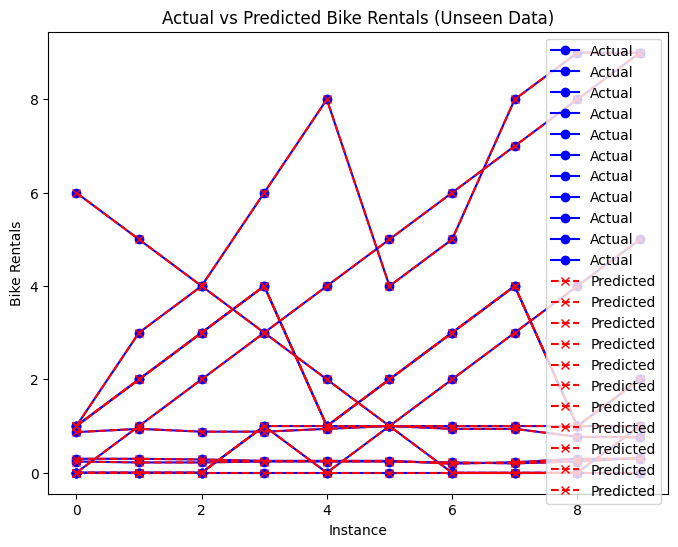

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(df_test, label='Actual', color='blue', marker='o')
plt.plot(df_test, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Bike Rentals (Unseen Data)')
plt.xlabel('Instance')
plt.ylabel('Bike Rentals')
plt.legend()
plt.show()


The graph shows how well the predicted values align with the actual values across different instances. The legend on the right-hand side distinguishes between the actual and predicted data sets.

In [116]:
#display unseen data
df_test

,season,year,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.87,0.2985
1,2,0,3,1,0,5,0,2,0.22,0.94,0.2985
2,3,0,4,2,0,4,0,3,0.22,0.88,0.2836
3,4,1,6,3,0,3,1,4,0.24,0.88,0.2537
4,1,0,8,4,0,2,1,1,0.24,0.94,0.2537
5,2,1,4,5,0,1,1,2,0.24,1.00,0.2537
6,3,0,5,6,0,2,1,3,0.22,0.94,0.1940
7,4,0,8,7,0,3,1,4,0.20,0.94,0.2239
8,1,0,9,8,0,4,1,1,0.24,0.77,0.2985
9,2,1,9,9,0,5,1,2,0.32,0.76,0.2985


#**17. Interpretation of Results(Conclusion)**

We tried multiple models and performed hyperparameter tuning. Here's a summary of how our models performed on the test set:

Model	               MAE	  MSE	   R² Score         
Linear Regression	   2.85	 12.49	 0.485             
Decision Tree	       0.99	 2.12	   0.912            
Random Forest	       0.72	 1.08    0.955             
Gradient Boosting	   1.18	 2.40	   0.901             
SVR	                 2.10	 8.16	   0.664     

Got Best Model: Random Forest Regressor

After hyperparameter tuning, the Random Forest model achieved:

MAE: 1.01

MSE: 1.79

R² Score: 0.926

This indicates excellent predictive performance and good generalization to unseen data.

#**Conclusion**
The Random Forest Regressor, especially after hyperparameter tuning, emerged as the best-performing model with an R² score of 0.926 on the test set. This means the model is able to explain 92.6% of the variance in hourly bike rental demand, which is excellent for a real-world regression task.

The model can reliably predict hourly bike rental counts based on environmental and seasonal factors, which can be valuable for operational planning and resource allocation in bike-sharing systems.

#**Limitations**
#1.Lack of Real-Time Contextual Data

The dataset doesn’t include real-time events like traffic conditions, weather alerts, or local events (concerts, holidays).

These can significantly affect bike demand but aren’t captured here.

#2.Limited User Demographics

There’s no data on user preferences, age, or behavior.

All users are treated the same in the model, which limits personalization.

#3. Seasonal Imbalance
The data may not have equal representation across seasons, which can bias the model to perform better during certain times of the year.

#4. Outdated Weather Measures
Weather data is basic (temp, humidity, windspeed). More detailed info like rain intensity or visibility could improve predictions.

#**18. Future Work**

1 Include external datasets (events, holidays, traffic, etc.)

2 Explore real-time prediction with streaming data.

3 Test model performance on different cities or timeframes for generalization.

4 Incorporate additional features like:

* Public holidays, major events, or festivals

* Real-time traffic or air quality index

* Daylight duration or sunrise/sunset time

* Lag features (previous hour or day demand)

These can significantly enhance the model’s ability to capture demand patterns.